# Handwritten Digit Classifier

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import models, layers
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from sklearn.metrics import accuracy_score

2024-10-03 05:45:53.102812: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-03 05:45:53.102927: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-03 05:45:53.268240: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [3]:
train.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
image=train.drop(columns='label')

In [5]:
image

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
image.iloc[0].shape

(784,)

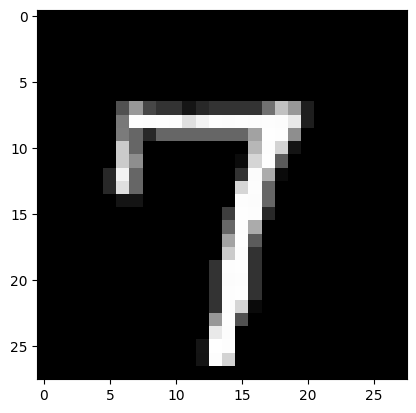

In [7]:

image1 =image.iloc[6].values
re_image = image1.reshape(28,28)
plt.imshow(re_image,cmap ='gray')
plt.show()

Re-shaping 1 dimensional pixel values into 28 * 28 to feed into neural network

In [8]:
np_image = image.values
re_image=np_image.reshape(-1,28,28)
re_image.shape

(42000, 28, 28)

Normalizing the data by dividing with maximum pixel value(255)

In [9]:
re_image = re_image/255

In [10]:
y = train['label']
y

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [11]:
y=y.values.reshape(-1,1)

In [12]:

encoder = OneHotEncoder()
y_encoded = encoder.fit_transform(y)
print(y_encoded.toarray())

[[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [13]:
Y = y_encoded.toarray()
Y[0]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

In [14]:

x_train, x_test, y_train, y_test = train_test_split(re_image,Y,test_size=0.2,random_state = 42, stratify =Y)

In [15]:
classifier = models.Sequential()
classifier.add(Conv2D(32,kernel_size =(3,3),padding ='Same',activation ='relu',input_shape = (28,28,1)))
classifier.add(MaxPool2D(pool_size=(2,2)))
classifier.add(Conv2D(64,kernel_size =(3,3),padding ='Same',activation = 'relu'))
classifier.add(MaxPool2D(pool_size=(2,2)))
classifier.add(Conv2D(64,kernel_size =(3,3),padding ='Same',activation = 'relu'))
classifier.add(MaxPool2D(pool_size=(2,2)))
classifier.add(Flatten())
classifier.add(Dense(64, activation = 'relu'))
classifier.add(Dropout(0.3))
classifier.add(Dense(32,activation = 'relu'))
classifier.add(Dense(10,activation ='softmax'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [16]:
classifier.compile(loss = 'categorical_crossentropy',optimizer = 'adam', metrics = ['accuracy'])

In [17]:
x_train[0].shape

(28, 28)

In [18]:
classifier.fit(x_train,y_train,epochs = 50,batch_size=32)

Epoch 1/50
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 24ms/step - accuracy: 0.7406 - loss: 0.7521
Epoch 2/50
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - accuracy: 0.9688 - loss: 0.1045
Epoch 3/50
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 26ms/step - accuracy: 0.9787 - loss: 0.0697
Epoch 4/50
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 24ms/step - accuracy: 0.9825 - loss: 0.0551
Epoch 5/50
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 24ms/step - accuracy: 0.9864 - loss: 0.0447
Epoch 6/50
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 24ms/step - accuracy: 0.9881 - loss: 0.0402
Epoch 7/50
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.9898 - loss: 0.0348
Epoch 8/50
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 25s 24ms/step - accuracy: 0.9920 - loss: 0.0265
Epoch 9/50
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 27ms/step - accuracy: 0.9909 - loss: 0.0272
Epoch 10/50
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.9935 - loss: 0.0204
Epoch 11/50
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 24s 23ms/step - accuracy: 0.9943 - loss: 0.0170
Epoch 12

In [19]:
classifier.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 285,248 (1.09 MB)

 Trainable params: 95,082 (371.41 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 190,166 (742.84 KB)

In [20]:
y_pred = classifier.predict(x_test)

263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


In [21]:
y_pred[0]

array([4.7817681e-25, 2.1841345e-22, 9.9999994e-01, 4.5157901e-14,
       1.1727669e-24, 2.1314396e-30, 1.5694835e-26, 3.2937379e-17,
       1.5288670e-21, 2.4912263e-26], dtype=float32)

In [22]:
y_pred_categorical = np.argmax(y_pred, axis=1)

In [23]:
y_test_categorical = np.argmax(y_test, axis=1)

In [24]:
y_test_categorical

array([2, 5, 0, ..., 8, 6, 5])

In [25]:
y_pred_categorical

array([2, 5, 0, ..., 8, 6, 5])

In [26]:
y_test

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [27]:
accuracy_score(y_test_categorical,y_pred_categorical)


0.9908333333333333

In [28]:
test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [29]:
test_shape=test.values.reshape(-1,28,28)

In [30]:
test_shape = test_shape.reshape(-1,28,28)

In [31]:
test_shape=test_shape/255

In [32]:
y_final= classifier.predict(test_shape)

875/875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step


In [33]:
y_final.shape

(28000, 10)

In [34]:
submission = pd.read_csv('/kaggle/input/digit-recognizer/sample_submission.csv')
submission

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
27995,27996,0
27996,27997,0
27997,27998,0
27998,27999,0


In [35]:
y_final_categorical = np.argmax(y_final, axis=1)

In [36]:
submission['Label']=y_final_categorical

In [37]:
submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [38]:
submission.to_csv("submission.csv",index=False)